In [1]:
import pandas as pd
from catboost import CatBoostClassifier, Pool
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import GridSearchCV

In [3]:
train_df = pd.read_csv('parsed_final_data_season_3.csv.zip', compression='zip')
test_df = pd.read_csv('final_test_data_season_3.csv.zip', compression='zip')

/tmp/ipykernel_10301/3222708738.py:1: DtypeWarning: Columns (15,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  train_df = pd.read_csv('parsed_final_data_season_3.csv.zip', compression='zip')


In [4]:
train_df = train_df.drop('Unnamed: 0', axis=1)
test_df = test_df.drop('Unnamed: 0', axis=1)

In [5]:
target_column = 'click'
feature_columns = train_df.columns.difference([target_column, 'bid_id'])
categorical_features = ['region_id', 'city_id', 'ad_slot_visibility',
       'ad_slot_format', 'creative_id', 'advertiser_id', 'part_of_day',
       'weekday', 'weekend', 'os', 'browser',
       'is_mobile_device', 'is_male', 'is_long_term_interest', 'is_in_market',
       'is_info_cat', 'is_products_cat', 'is_service_cat',
       'is_entertainment_cat', 'is_girly_cat']

In [6]:
train_df = train_df.fillna(value=False)

In [7]:
from sklearn.model_selection import train_test_split
train_df, val_df = train_test_split(train_df, test_size=0.2, random_state=42, stratify=train_df[target_column])


In [8]:
# train_pool = Pool(data=train_df[feature_columns],
#                   label=train_df[target_column],
#                   cat_features=categorical_features)

In [9]:
test_pool = Pool(data=test_df[feature_columns],
                 label=test_df[target_column],
                 cat_features=categorical_features)

In [10]:
val_pool = Pool(data=val_df[feature_columns],
                 label=val_df[target_column],
                 cat_features=categorical_features)

In [11]:
class_counts = train_df[target_column].value_counts()
class_counts

False    17063938
True         9338
Name: click, dtype: int64

In [12]:
class_0_count = class_counts.get(0, 1)
class_1_count = class_counts.get(1, 1)
class_0_count

17063938

In [13]:
total_count = class_0_count + class_1_count
class_weights = [total_count / class_0_count, total_count / class_1_count]

In [18]:
param_grid = {
    'depth': [3, 4, 5],
    'learning_rate': [0.01, 0.05],
    'iterations': [300, 500],
    'l2_leaf_reg': [2, 3, 4]
}
cat_model = CatBoostClassifier(
    task_type='GPU',
    loss_function='Logloss',
    eval_metric='AUC',
    early_stopping_rounds=100,
    class_weights=class_weights,
    cat_features=categorical_features,
    verbose=50
)

In [ ]:
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid, scoring='roc_auc', cv=3, return_train_score=True)
grid_search.fit(X=val_df[feature_columns], y=val_df[target_column])

print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best ROC AUC Score: {grid_search.best_score_}")

250:	total: 23.2s	remaining: 23s
300:	total: 27.8s	remaining: 18.4s
350:	total: 32.5s	remaining: 13.8s
400:	total: 37.2s	remaining: 9.18s
450:	total: 41.9s	remaining: 4.55s
499:	total: 46.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 95.5ms	remaining: 47.7s
50:	total: 4.74s	remaining: 41.7s
100:	total: 9.42s	remaining: 37.2s
150:	total: 14.1s	remaining: 32.5s
200:	total: 18.7s	remaining: 27.8s
250:	total: 23.3s	remaining: 23.1s
300:	total: 27.9s	remaining: 18.5s
350:	total: 32.5s	remaining: 13.8s
400:	total: 37.2s	remaining: 9.17s
450:	total: 41.8s	remaining: 4.54s
499:	total: 46.4s	remaining: 0us


IOStream.flush timed out
IOStream.flush timed out
Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 96.2ms	remaining: 48s
50:	total: 4.72s	remaining: 41.5s
100:	total: 9.39s	remaining: 37.1s
150:	total: 14s	remaining: 32.4s
200:	total: 18.7s	remaining: 27.8s
250:	total: 23.3s	remaining: 23.1s
300:	total: 27.9s	remaining: 18.5s
350:	total: 32.6s	remaining: 13.8s
400:	total: 37.3s	remaining: 9.2s
450:	total: 41.9s	remaining: 4.55s
499:	total: 46.4s	remaining: 0us


IOStream.flush timed out
IOStream.flush timed out
Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 88.3ms	remaining: 44.1s
50:	total: 4.59s	remaining: 40.4s
100:	total: 9.14s	remaining: 36.1s
150:	total: 13.8s	remaining: 31.9s
200:	total: 18.5s	remaining: 27.5s
250:	total: 23.2s	remaining: 23s
300:	total: 27.8s	remaining: 18.4s
350:	total: 32.5s	remaining: 13.8s
400:	total: 37.2s	remaining: 9.19s
450:	total: 41.9s	remaining: 4.56s
499:	total: 46.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 94.8ms	remaining: 47.3s
50:	total: 4.64s	remaining: 40.9s
100:	total: 9.24s	remaining: 36.5s
150:	total: 14s	remaining: 32.4s
200:	total: 18.8s	remaining: 28s
250:	total: 23.5s	remaining: 23.3s
300:	total: 28.1s	remaining: 18.6s
350:	total: 32.8s	remaining: 13.9s
400:	total: 37.6s	remaining: 9.28s
450:	total: 42.3s	remaining: 4.59s
499:	total: 46.8s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 96.4ms	remaining: 48.1s
50:	total: 4.69s	remaining: 41.3s
100:	total: 9.33s	remaining: 36.9s
150:	total: 14.1s	remaining: 32.5s
200:	total: 18.9s	remaining: 28.2s
250:	total: 23.7s	remaining: 23.5s
300:	total: 28.4s	remaining: 18.8s
350:	total: 33.1s	remaining: 14s
400:	total: 37.7s	remaining: 9.32s
450:	total: 42.4s	remaining: 4.6s
499:	total: 46.9s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 88.6ms	remaining: 44.2s
50:	total: 4.69s	remaining: 41.3s
100:	total: 9.34s	remaining: 36.9s
150:	total: 14s	remaining: 32.3s
200:	total: 18.6s	remaining: 27.6s
250:	total: 23.1s	remaining: 23s
300:	total: 27.8s	remaining: 18.4s
350:	total: 32.5s	remaining: 13.8s
400:	total: 37.1s	remaining: 9.17s
450:	total: 41.8s	remaining: 4.54s
499:	total: 46.3s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 95.4ms	remaining: 47.6s
50:	total: 4.78s	remaining: 42.1s
100:	total: 9.45s	remaining: 37.3s
150:	total: 14.1s	remaining: 32.6s
200:	total: 18.7s	remaining: 27.8s
250:	total: 23.3s	remaining: 23.2s
300:	total: 28s	remaining: 18.5s
350:	total: 32.7s	remaining: 13.9s
400:	total: 37.3s	remaining: 9.21s
450:	total: 41.9s	remaining: 4.55s
499:	total: 46.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 96.9ms	remaining: 48.4s
50:	total: 4.81s	remaining: 42.4s
100:	total: 9.5s	remaining: 37.5s
150:	total: 14.1s	remaining: 32.7s
200:	total: 18.8s	remaining: 28s
250:	total: 23.4s	remaining: 23.2s
300:	total: 28s	remaining: 18.5s
350:	total: 32.7s	remaining: 13.9s
400:	total: 37.3s	remaining: 9.21s
450:	total: 42s	remaining: 4.56s
499:	total: 46.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.9ms	remaining: 28.1s
50:	total: 5.14s	remaining: 25.1s
100:	total: 10.2s	remaining: 20.1s
150:	total: 15.4s	remaining: 15.2s
200:	total: 20.7s	remaining: 10.2s
250:	total: 25.9s	remaining: 5.05s
299:	total: 31.1s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 113ms	remaining: 33.7s
50:	total: 5.3s	remaining: 25.9s
100:	total: 10.5s	remaining: 20.7s
150:	total: 15.8s	remaining: 15.6s
200:	total: 21.1s	remaining: 10.4s
250:	total: 26.3s	remaining: 5.13s
299:	total: 31.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 102ms	remaining: 30.5s
50:	total: 5.26s	remaining: 25.7s
100:	total: 10.4s	remaining: 20.5s
150:	total: 15.7s	remaining: 15.5s
200:	total: 20.9s	remaining: 10.3s
250:	total: 26.2s	remaining: 5.11s
299:	total: 31.4s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.6ms	remaining: 28s
50:	total: 5.2s	remaining: 25.4s
100:	total: 10.5s	remaining: 20.6s
150:	total: 15.6s	remaining: 15.4s
200:	total: 20.7s	remaining: 10.2s
250:	total: 25.8s	remaining: 5.03s
299:	total: 30.8s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 34s
50:	total: 5.32s	remaining: 26s
100:	total: 10.4s	remaining: 20.5s
150:	total: 15.6s	remaining: 15.4s
200:	total: 20.7s	remaining: 10.2s
250:	total: 25.8s	remaining: 5.03s
299:	total: 30.7s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 30.3s
50:	total: 5.37s	remaining: 26.2s
100:	total: 10.6s	remaining: 21s
150:	total: 15.8s	remaining: 15.6s
200:	total: 20.9s	remaining: 10.3s
250:	total: 26s	remaining: 5.08s
299:	total: 31s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.6ms	remaining: 28s
50:	total: 5.12s	remaining: 25s
100:	total: 10.2s	remaining: 20s
150:	total: 15.4s	remaining: 15.2s
200:	total: 20.6s	remaining: 10.2s
250:	total: 25.8s	remaining: 5.04s
299:	total: 31.1s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 113ms	remaining: 33.9s
50:	total: 5.29s	remaining: 25.9s
100:	total: 10.5s	remaining: 20.7s
150:	total: 15.8s	remaining: 15.6s
200:	total: 21.1s	remaining: 10.4s
250:	total: 26.3s	remaining: 5.14s
299:	total: 31.6s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 30.2s
50:	total: 5.26s	remaining: 25.7s
100:	total: 10.4s	remaining: 20.5s
150:	total: 15.7s	remaining: 15.4s
200:	total: 21s	remaining: 10.3s
250:	total: 26.2s	remaining: 5.12s
299:	total: 31.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.5ms	remaining: 28s
50:	total: 5.22s	remaining: 25.5s
100:	total: 10.4s	remaining: 20.6s
150:	total: 15.6s	remaining: 15.4s
200:	total: 20.8s	remaining: 10.2s
250:	total: 25.9s	remaining: 5.05s
299:	total: 30.9s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 34s
50:	total: 5.35s	remaining: 26.1s
100:	total: 10.5s	remaining: 20.7s
150:	total: 15.8s	remaining: 15.6s
200:	total: 21s	remaining: 10.3s
250:	total: 26s	remaining: 5.08s
299:	total: 31.1s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 102ms	remaining: 30.4s
50:	total: 5.38s	remaining: 26.3s
100:	total: 10.7s	remaining: 21.1s
150:	total: 15.9s	remaining: 15.7s
200:	total: 21.1s	remaining: 10.4s
250:	total: 26.3s	remaining: 5.13s
299:	total: 31.3s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.1ms	remaining: 27.8s
50:	total: 5.12s	remaining: 25s
100:	total: 10.2s	remaining: 20s
150:	total: 15.4s	remaining: 15.2s
200:	total: 20.7s	remaining: 10.2s
250:	total: 25.9s	remaining: 5.05s
299:	total: 31.1s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 34.2s
50:	total: 5.31s	remaining: 25.9s
100:	total: 10.5s	remaining: 20.7s
150:	total: 15.9s	remaining: 15.7s
200:	total: 21.2s	remaining: 10.4s
250:	total: 26.4s	remaining: 5.15s
299:	total: 31.6s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 102ms	remaining: 30.5s
50:	total: 5.28s	remaining: 25.8s
100:	total: 10.4s	remaining: 20.5s
150:	total: 15.7s	remaining: 15.5s
200:	total: 21s	remaining: 10.3s
250:	total: 26.3s	remaining: 5.14s
299:	total: 31.6s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.3ms	remaining: 27.9s
50:	total: 5.23s	remaining: 25.6s
100:	total: 10.5s	remaining: 20.6s
150:	total: 15.6s	remaining: 15.4s
200:	total: 20.8s	remaining: 10.3s
250:	total: 25.9s	remaining: 5.05s
299:	total: 31s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 113ms	remaining: 33.8s
50:	total: 5.32s	remaining: 26s
100:	total: 10.4s	remaining: 20.6s
150:	total: 15.6s	remaining: 15.4s
200:	total: 20.8s	remaining: 10.2s
250:	total: 25.8s	remaining: 5.04s
299:	total: 30.9s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 30.2s
50:	total: 5.38s	remaining: 26.3s
100:	total: 10.7s	remaining: 21s
150:	total: 16s	remaining: 15.7s
200:	total: 21.1s	remaining: 10.4s
250:	total: 26.2s	remaining: 5.12s
299:	total: 31.2s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 92.9ms	remaining: 46.4s
50:	total: 5.1s	remaining: 44.9s
100:	total: 10.2s	remaining: 40.2s
150:	total: 15.4s	remaining: 35.5s
200:	total: 20.6s	remaining: 30.7s
250:	total: 25.9s	remaining: 25.7s
300:	total: 31.2s	remaining: 20.6s
350:	total: 36.5s	remaining: 15.5s
400:	total: 41.8s	remaining: 10.3s
450:	total: 47.1s	remaining: 5.11s
499:	total: 52.2s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 57s
50:	total: 5.3s	remaining: 46.7s
100:	total: 10.5s	remaining: 41.5s
150:	total: 15.8s	remaining: 36.6s
200:	total: 21.1s	remaining: 31.4s
250:	total: 26.4s	remaining: 26.2s
300:	total: 31.7s	remaining: 21s
350:	total: 37s	remaining: 15.7s
400:	total: 42.3s	remaining: 10.4s
450:	total: 47.6s	remaining: 5.17s
499:	total: 52.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 50.4s
50:	total: 5.25s	remaining: 46.2s
100:	total: 10.4s	remaining: 41.1s
150:	total: 15.6s	remaining: 36.2s
200:	total: 20.9s	remaining: 31.1s
250:	total: 26.2s	remaining: 26s
300:	total: 31.5s	remaining: 20.8s
350:	total: 36.7s	remaining: 15.6s
400:	total: 42.1s	remaining: 10.4s
450:	total: 47.2s	remaining: 5.13s
499:	total: 52.4s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.6ms	remaining: 46.7s
50:	total: 5.26s	remaining: 46.3s
100:	total: 10.5s	remaining: 41.4s
150:	total: 15.6s	remaining: 36.1s
200:	total: 20.8s	remaining: 30.9s
250:	total: 25.8s	remaining: 25.6s
300:	total: 31s	remaining: 20.5s
350:	total: 36.3s	remaining: 15.4s
400:	total: 41.4s	remaining: 10.2s
450:	total: 46.6s	remaining: 5.06s
499:	total: 51.7s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 57.1s
50:	total: 5.32s	remaining: 46.8s
100:	total: 10.4s	remaining: 41.2s
150:	total: 15.7s	remaining: 36.2s
200:	total: 20.7s	remaining: 30.8s
250:	total: 25.9s	remaining: 25.6s
300:	total: 30.9s	remaining: 20.5s
350:	total: 36.1s	remaining: 15.3s
400:	total: 41.3s	remaining: 10.2s
450:	total: 46.3s	remaining: 5.04s
499:	total: 51.3s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 50.5s
50:	total: 5.38s	remaining: 47.4s
100:	total: 10.7s	remaining: 42.2s
150:	total: 15.9s	remaining: 36.8s
200:	total: 21s	remaining: 31.3s
250:	total: 26.3s	remaining: 26.1s
300:	total: 31.4s	remaining: 20.8s
350:	total: 36.6s	remaining: 15.5s
400:	total: 41.9s	remaining: 10.3s
450:	total: 46.9s	remaining: 5.1s
499:	total: 52s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.4ms	remaining: 46.6s
50:	total: 5.13s	remaining: 45.1s
100:	total: 10.2s	remaining: 40.2s
150:	total: 15.4s	remaining: 35.7s
200:	total: 20.7s	remaining: 30.8s
250:	total: 25.9s	remaining: 25.7s
300:	total: 31.3s	remaining: 20.7s
350:	total: 36.6s	remaining: 15.5s
400:	total: 42s	remaining: 10.4s
450:	total: 47.2s	remaining: 5.13s
499:	total: 52.4s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 56.9s
50:	total: 5.34s	remaining: 47s
100:	total: 10.6s	remaining: 41.8s
150:	total: 15.9s	remaining: 36.8s
200:	total: 21.2s	remaining: 31.6s
250:	total: 26.5s	remaining: 26.3s
300:	total: 31.9s	remaining: 21.1s
350:	total: 37.2s	remaining: 15.8s
400:	total: 42.5s	remaining: 10.5s
450:	total: 47.8s	remaining: 5.19s
499:	total: 52.8s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 102ms	remaining: 50.7s
50:	total: 5.25s	remaining: 46.3s
100:	total: 10.4s	remaining: 41.1s
150:	total: 15.7s	remaining: 36.2s
200:	total: 20.9s	remaining: 31.1s
250:	total: 26.2s	remaining: 26s
300:	total: 31.6s	remaining: 20.9s
350:	total: 36.8s	remaining: 15.6s
400:	total: 42.2s	remaining: 10.4s
450:	total: 47.3s	remaining: 5.14s
499:	total: 52.4s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.5ms	remaining: 46.6s
50:	total: 5.23s	remaining: 46.1s
100:	total: 10.5s	remaining: 41.3s
150:	total: 15.6s	remaining: 36.2s
200:	total: 20.8s	remaining: 31s
250:	total: 25.9s	remaining: 25.7s
300:	total: 31.1s	remaining: 20.6s
350:	total: 36.3s	remaining: 15.4s
400:	total: 41.4s	remaining: 10.2s
450:	total: 46.6s	remaining: 5.06s
499:	total: 51.6s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 56.9s
50:	total: 5.3s	remaining: 46.7s
100:	total: 10.4s	remaining: 41.2s
150:	total: 15.6s	remaining: 36.1s
200:	total: 20.8s	remaining: 31s
250:	total: 25.9s	remaining: 25.7s
300:	total: 31s	remaining: 20.5s
350:	total: 36s	remaining: 15.3s
400:	total: 41.2s	remaining: 10.2s
450:	total: 46.2s	remaining: 5.02s
499:	total: 51.2s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 50.4s
50:	total: 5.34s	remaining: 47s
100:	total: 10.6s	remaining: 41.9s
150:	total: 15.8s	remaining: 36.5s
200:	total: 20.9s	remaining: 31.1s
250:	total: 26.1s	remaining: 25.9s
300:	total: 31.1s	remaining: 20.6s
350:	total: 36.4s	remaining: 15.4s
400:	total: 41.6s	remaining: 10.3s
450:	total: 46.7s	remaining: 5.08s
499:	total: 51.8s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.5ms	remaining: 46.7s
50:	total: 5.12s	remaining: 45.1s
100:	total: 10.2s	remaining: 40.3s
150:	total: 15.4s	remaining: 35.6s
200:	total: 20.7s	remaining: 30.8s
250:	total: 25.9s	remaining: 25.7s
300:	total: 31.3s	remaining: 20.7s
350:	total: 36.6s	remaining: 15.5s
400:	total: 41.9s	remaining: 10.3s
450:	total: 47.2s	remaining: 5.12s
499:	total: 52.3s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 56.8s
50:	total: 5.32s	remaining: 46.8s
100:	total: 10.5s	remaining: 41.5s
150:	total: 15.9s	remaining: 36.7s
200:	total: 21.1s	remaining: 31.4s
250:	total: 26.3s	remaining: 26.1s
300:	total: 31.7s	remaining: 20.9s
350:	total: 37s	remaining: 15.7s
400:	total: 42.2s	remaining: 10.4s
450:	total: 47.4s	remaining: 5.15s
499:	total: 52.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 50.5s
50:	total: 5.25s	remaining: 46.2s
100:	total: 10.4s	remaining: 41.1s
150:	total: 15.7s	remaining: 36.2s
200:	total: 20.9s	remaining: 31.1s
250:	total: 26.2s	remaining: 26s
300:	total: 31.6s	remaining: 20.9s
350:	total: 36.9s	remaining: 15.6s
400:	total: 42.2s	remaining: 10.4s
450:	total: 47.3s	remaining: 5.14s
499:	total: 52.3s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 93.9ms	remaining: 46.8s
50:	total: 5.23s	remaining: 46.1s
100:	total: 10.5s	remaining: 41.4s
150:	total: 15.7s	remaining: 36.2s
200:	total: 20.8s	remaining: 31s
250:	total: 25.9s	remaining: 25.7s
300:	total: 31s	remaining: 20.5s
350:	total: 36.2s	remaining: 15.4s
400:	total: 41.4s	remaining: 10.2s
450:	total: 46.5s	remaining: 5.05s
499:	total: 51.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 114ms	remaining: 56.7s
50:	total: 5.33s	remaining: 47s
100:	total: 10.5s	remaining: 41.4s
150:	total: 15.6s	remaining: 36.1s
200:	total: 20.9s	remaining: 31s
250:	total: 26s	remaining: 25.8s
300:	total: 31.1s	remaining: 20.6s
350:	total: 36.2s	remaining: 15.4s
400:	total: 41.4s	remaining: 10.2s
450:	total: 46.5s	remaining: 5.05s
499:	total: 51.5s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 101ms	remaining: 50.6s
50:	total: 5.38s	remaining: 47.4s
100:	total: 10.7s	remaining: 42.2s
150:	total: 16s	remaining: 36.9s
200:	total: 21.1s	remaining: 31.4s
250:	total: 26.2s	remaining: 26s
300:	total: 31.3s	remaining: 20.7s
350:	total: 36.5s	remaining: 15.5s
400:	total: 41.7s	remaining: 10.3s
450:	total: 46.8s	remaining: 5.09s
499:	total: 52s	remaining: 0us


Default metric period is 5 because AUC is/are not implemented for GPU


0:	total: 203ms	remaining: 1m 41s
50:	total: 9.65s	remaining: 1m 24s
100:	total: 19.2s	remaining: 1m 15s
150:	total: 28.4s	remaining: 1m 5s
200:	total: 37.7s	remaining: 56s
250:	total: 46.7s	remaining: 46.3s
300:	total: 56s	remaining: 37s
350:	total: 1m 5s	remaining: 27.7s
400:	total: 1m 14s	remaining: 18.4s
450:	total: 1m 23s	remaining: 9.11s
499:	total: 1m 32s	remaining: 0us
Best Parameters: {'depth': 5, 'iterations': 500, 'l2_leaf_reg': 4, 'learning_rate': 0.05}
Best ROC AUC Score: 0.8885604061702361


In [ ]:
best_model = grid_search.best_estimator_
predictions = best_model.predict_proba(test_pool)[:, 1]

In [ ]:
test_roc_auc = roc_auc_score(test_df[target_column], predictions)
print(f"Test ROC AUC Score: {test_roc_auc}")

Test ROC AUC Score: 0.6662055836717062


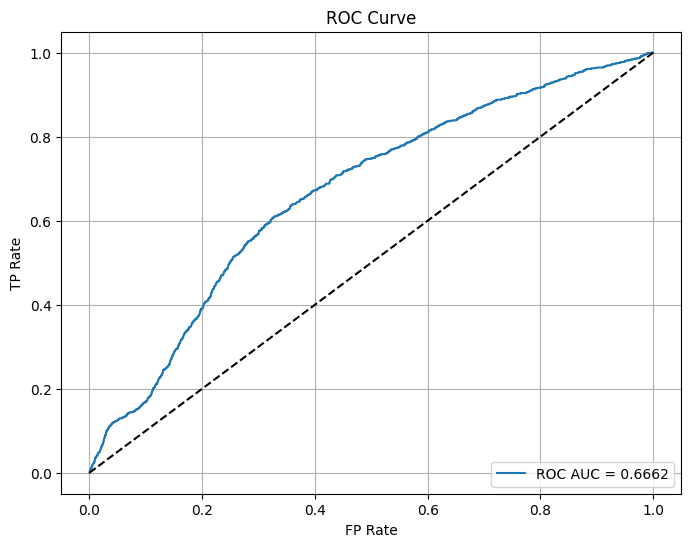

In [27]:
fpr, tpr, thresholds = roc_curve(test_df[target_column], predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {test_roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

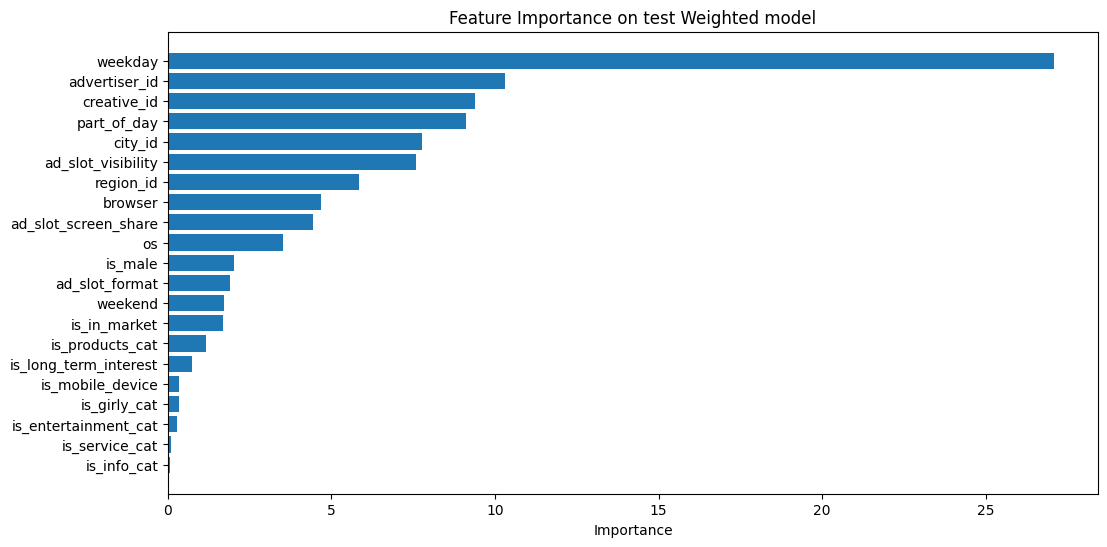

In [28]:
feature_importances = best_model.get_feature_importance(test_pool)
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance on test Weighted model')
plt.gca().invert_yaxis()
plt.show()

In [29]:
import json
with open('hyperparameters_optimization_results.txt', 'w') as f:
    f.write("\n Best Parameters \n")
    f.write(json.dumps(grid_search.best_params_))
    f.write("\n Best ROC AUC Score \n")
    f.write(json.dumps(grid_search.best_score_))
    f.write("\n Test ROC AUC Score \n")
    f.write(json.dumps(test_roc_auc))

In [30]:
train_pool = Pool(data=train_df[feature_columns],
                  label=train_df[target_column],
                  cat_features=categorical_features)

IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out
IOStream.flush timed out


In [31]:
best_model.fit(train_pool, eval_set=val_pool, early_stopping_rounds=100, verbose=True)

Default metric period is 5 because AUC is/are not implemented for GPU


0:	test: 0.8184993	best: 0.8184993 (0)	total: 1.52s	remaining: 12m 37s
1:	total: 2.92s	remaining: 12m 6s
2:	total: 4.57s	remaining: 12m 36s
3:	total: 6.03s	remaining: 12m 27s
4:	total: 7.41s	remaining: 12m 13s
5:	test: 0.8474709	best: 0.8474709 (5)	total: 8.92s	remaining: 12m 14s
6:	total: 10.4s	remaining: 12m 15s
7:	total: 11.9s	remaining: 12m 10s
8:	total: 13.5s	remaining: 12m 15s
9:	total: 15.1s	remaining: 12m 19s
10:	test: 0.8542297	best: 0.8542297 (10)	total: 16.9s	remaining: 12m 29s
11:	total: 18.7s	remaining: 12m 38s
12:	total: 20.5s	remaining: 12m 48s
13:	total: 22.4s	remaining: 12m 58s
14:	total: 23.9s	remaining: 12m 54s
15:	test: 0.8577102	best: 0.8577102 (15)	total: 25.6s	remaining: 12m 55s
16:	total: 27.4s	remaining: 12m 57s
17:	total: 29.2s	remaining: 13m 3s
18:	total: 30.7s	remaining: 12m 57s
19:	total: 32.3s	remaining: 12m 55s
20:	test: 0.8685608	best: 0.8685608 (20)	total: 33.9s	remaining: 12m 52s
21:	total: 35.1s	remaining: 12m 42s
22:	total: 37.2s	remaining: 12m 51s
2

In [32]:
predictions = best_model.predict_proba(test_pool)[:, 1]

In [37]:
eval_results = best_model.get_evals_result()
eval_results['validation'].keys()

dict_keys(['Logloss', 'AUC'])

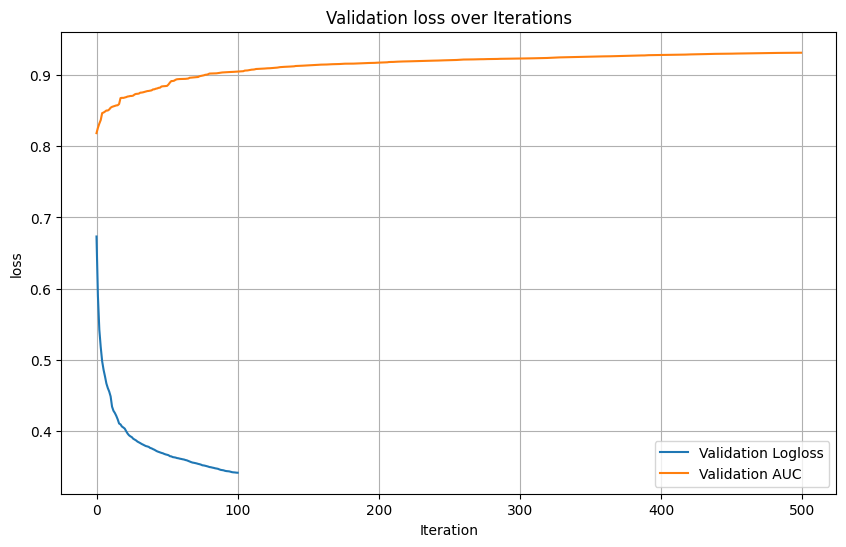

In [38]:
validation_loss = eval_results['validation']['Logloss']

plt.figure(figsize=(10, 6))
plt.plot(range(0, len(eval_results['validation']['Logloss'])), eval_results['validation']['Logloss'], label='Validation Logloss')
plt.plot(range(0, len(eval_results['validation']['AUC'])), eval_results['validation']['AUC'], label='Validation AUC')
plt.xlabel('Iteration')
plt.ylabel('loss')
plt.title('Validation loss over Iterations')
plt.legend()
plt.grid()
plt.show()

In [39]:
roc_auc = roc_auc_score(test_df[target_column], predictions)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.6262


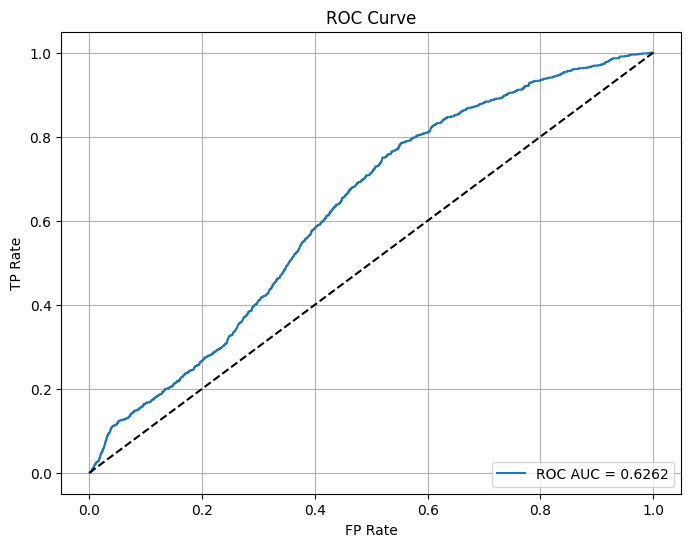

In [41]:
fpr, tpr, thresholds = roc_curve(test_df[target_column], predictions)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC AUC = {roc_auc:.4f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('FP Rate')
plt.ylabel('TP Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

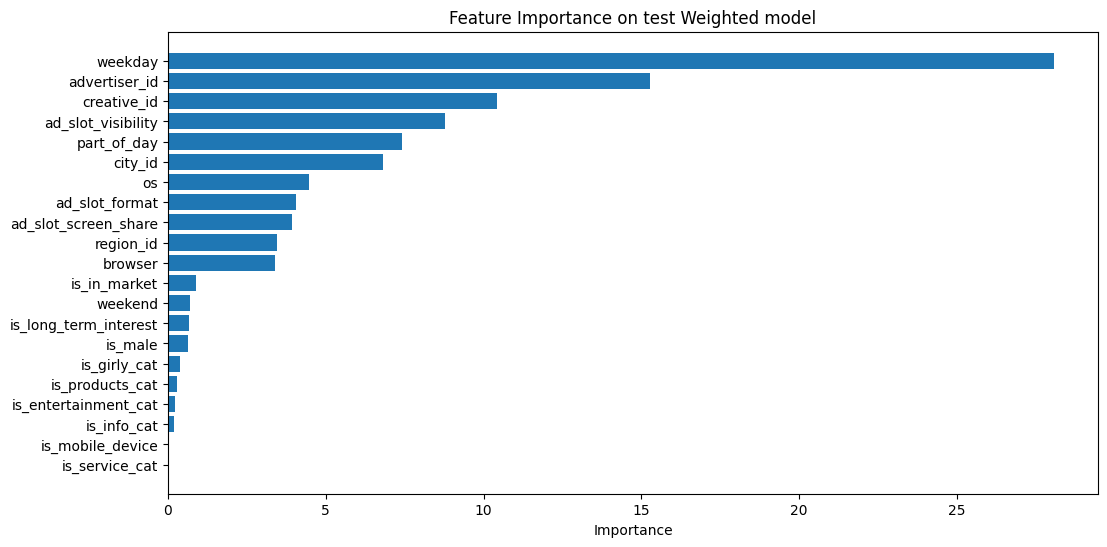

In [42]:
feature_importances = best_model.get_feature_importance(test_pool)
feature_importances_df = pd.DataFrame({'Feature': feature_columns, 'Importance': feature_importances})

feature_importances_df.sort_values(by='Importance', ascending=False, inplace=True)

plt.figure(figsize=(12, 6))
plt.barh(feature_importances_df['Feature'], feature_importances_df['Importance'])
plt.xlabel('Importance')
plt.title('Feature Importance on test Weighted model')
plt.gca().invert_yaxis()
plt.show()

In [43]:
best_model.save_model('best_on_val_catboost_model_weighted_season_3.cbm')